In [1]:
import sys
import os
import time
import pandas as pd 
import numpy as np
from collections import Counter
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns',10000)
sys.path.append('/Users/yantingting/PycharmProjects/modeling/')
import database_conncet as data_qry
import plot_tools as pt
import data_processing as dp


In [2]:
file_path = '/Users/yantingting/Seafile/风控/模型/13 菲律宾/线上模型复盘/老客户/'

In [3]:
my_info = pd.read_csv(file_path + 'my_info.csv')
my_var2 = pd.read_csv(file_path + 'my_var2.csv')
my_flag = pd.read_csv(file_path + 'my_flag.csv')
my_df = pd.merge(my_info, my_var2, on='order_key', how='left')
my_df = pd.merge(my_df, my_flag, left_on='order_key', right_on='order_no', how='left')
my_df.to_csv(file_path + 'my_df.csv',index = False)

In [4]:
my_df = pd.read_csv(file_path + 'my_df.csv')

In [5]:
df_train_test = my_df[(my_df['effective_date'] >='2019-09-05') & (my_df['effective_date']<='2019-12-15')]
df_train_test.shape[0]
df_train = my_df[(my_df['effective_date'] >='2019-09-05') & (my_df['effective_date']<='2019-10-15')]
df_train.shape[0]
df_test = my_df[(my_df['effective_date'] >='2019-10-16') & (my_df['effective_date']<='2019-12-15')]
df_test.shape[0]
df_train_test.to_excel(file_path + 'df_train_test.xlsx', index = False)

5352

4168

1184

In [7]:
feature_list = [ '申请笔数', '放款笔数',
       '失败笔数',  '第一次还款距今天数', '最近一次还款距今天数', '累计逾期天数',
       '最大逾期天数', '最小逾期天数', '最大展期次数', '最大结清天数(展期算新的订单)', '逾期订单数',
       '逾期次数(展期算新的订单)', '展期订单数', '总展期次数', '单笔最小结清天数', '单笔最大结清天数']
# var_list = ['v1', 'v2', 'v3', 'v4', 'v5','v6', 'v7', 'v8', 'v9', 'v10',
#            'v11', 'v12', 'v13', 'v14', 'v15','v16', 'v17', 'v18']
# var_dict = dict(zip(feature_list,var_list))
# my_df = my_df.rename(columns = var_dict)

In [66]:
df_train_test.corr().to_excel(file_path + 'corr_all.xlsx', index = True)
df_train_test.to_csv(file_path + 'df_train_test.csv', index = False)

In [48]:
my_df1  = df_train_test
my_result = pd.DataFrame()
data_group = my_df1[['order_no','flag1', 'effective_date']]
for col in feature_list:
    print('{} is in processing'.format(col))
    temp_frame = ContinuousBin(my_df1,'order_no', col , target = 'flag1', n = 10, special_attribute = [],method = 'equal freq')[0]
    ks = ContinuousBin(my_df1,'order_no' ,col , target = 'flag1', n = 10, special_attribute = [],method = 'equal freq')[1]
    iv = ContinuousBin(my_df1,'order_no' ,col , target = 'flag1', n = 10, special_attribute = [],method = 'equal freq')[2]
    data_temp = ContinuousBin(my_df1,'order_no' ,col , target = 'flag1', n = 10, special_attribute = [],method = 'equal freq')[3]
    data_group = pd.merge(data_group,data_temp, on='order_no', how='left')
    my_result = my_result.append(temp_frame)
    temp_frame
    print('KS = ', ks)
    print('IV = ', iv)
my_result.to_excel(file_path + 'my_result_all.xlsx', index =False)
data_group.to_excel(file_path + 'data_group.xlsx', index = False)

申请笔数 is in processing


/Users/yantingting/anaconda3/envs/modeling/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,申请笔数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 2.0]",3323,1013,2310,0.620889,0.304845,0.628022,0.617812,0.0102101,0.304845,0.0163911,0.000167354
2,"(2.0, 3.0]",814,261,553,0.152093,0.320639,0.789833,0.765713,0.0241199,0.307953,0.0898848,0.00125028
3,"(3.0, 4.0]",498,152,346,0.0930493,0.305221,0.884067,0.858251,0.0258161,0.307659,0.0181641,3.08106e-05
4,"(4.0, 5.0]",292,83,209,0.054559,0.284247,0.935524,0.914148,0.0213757,0.306272,-0.0827712,0.000367536
5,"(5.0, 16.0]",425,104,321,0.0794096,0.244706,1,1,0,0.301383,-0.286328,0.00612046


KS =  0.025816086766273005
IV =  0.007936437212525863
放款笔数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,放款笔数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 2.0]",3687,1177,2510,0.688901,0.31923,0.729696,0.671302,0.0583937,0.31923,0.0834085,0.00487053
2,"(2.0, 3.0]",732,214,518,0.136771,0.29235,0.862368,0.809842,0.0525261,0.314777,-0.0432768,0.000253934
3,"(3.0, 4.0]",411,107,304,0.0767937,0.260341,0.928704,0.891147,0.0375569,0.310145,-0.203476,0.00304587
4,"(4.0, 13.0]",522,115,407,0.0975336,0.220307,1,1,0,0.301383,-0.423159,0.0158925


KS =  0.058393730930837884
IV =  0.024062867115804864
失败笔数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,失败笔数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-8.001, 0.0]",4105,1184,2921,0.767003,0.288429,0.734036,0.781225,0.047189,0.288429,-0.0623051,0.00294011
2,"(0.0, 1.0]",862,275,587,0.161061,0.319026,0.904526,0.938219,0.033693,0.293739,0.0824687,0.00111299
3,"(1.0, 10.0]",385,154,231,0.0719357,0.4,1,1,0,0.301383,0.435257,0.0146651


KS =  0.04718896860839328
IV =  0.018718247860966392
第一次放款距今天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,第一次放款距今天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 12.0]",697,172,525,0.130232,0.246772,0.106634,0.140412,0.0337783,0.246772,-0.275181,0.00929515
2,"(12.0, 13.0]",696,229,467,0.130045,0.329023,0.248605,0.265312,0.0167065,0.287868,0.128115,0.00218715
3,"(13.0, 14.0]",363,127,236,0.0678251,0.349862,0.32734,0.32843,0.0010897,0.300683,0.221078,0.00345252
4,"(14.0, 19.0]",402,152,250,0.0751121,0.378109,0.421575,0.395293,0.0262818,0.315107,0.343142,0.00939233
5,"(19.0, 27.0]",571,185,386,0.106689,0.323993,0.536268,0.498529,0.0377388,0.316966,0.105241,0.00120574
6,"(27.0, 39.0]",495,172,323,0.0924888,0.347475,0.642901,0.584916,0.0579857,0.32165,0.210565,0.00426327
7,"(39.0, 49.0]",558,177,381,0.10426,0.317204,0.752635,0.686815,0.0658202,0.320994,0.0740728,0.000580324
8,"(49.0, 66.8]",499,133,366,0.0932362,0.266533,0.83509,0.784702,0.0503881,0.314646,-0.171562,0.00264756
9,"(66.8, 95.0]",541,152,389,0.101084,0.280961,0.929324,0.88874,0.0405839,0.310867,-0.0989764,0.000970381


KS =  0.06582018558426483
IV =  0.05240997758661393
最近一次放款距今天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最近一次放款距今天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",759,179,580,0.141816,0.235837,0.110973,0.155122,0.0441483,0.235837,-0.33492,0.0147862
2,"(11.0, 12.0]",538,151,387,0.100523,0.280669,0.204588,0.258625,0.0540376,0.254433,-0.100422,0.000993101
3,"(12.0, 13.0]",1565,474,1091,0.292414,0.302875,0.49845,0.550415,0.0519645,0.280922,0.00707973,1.46771e-05
4,"(13.0, 14.0]",862,282,580,0.161061,0.327146,0.67328,0.705536,0.0322566,0.291622,0.119601,0.00235708
5,"(14.0, 15.0]",378,161,217,0.0706278,0.425926,0.773094,0.763573,0.00952047,0.303998,0.542229,0.0226528
6,"(15.0, 16.0]",200,69,131,0.0373692,0.345,0.815871,0.798609,0.0172618,0.305904,0.199632,0.00154541
7,"(16.0, 22.0]",525,148,377,0.0980942,0.281905,0.907626,0.899438,0.00818719,0.303294,-0.0943105,0.000855831
8,"(22.0, 216.0]",525,149,376,0.0980942,0.28381,1,1,0,0.301383,-0.0849204,0.00069526


KS =  0.05403757614607313
IV =  0.04390029796064828
第一次还款距今天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,第一次还款距今天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",1805,599,1206,0.337257,0.331856,0.371358,0.322546,0.0488116,0.331856,0.14092,0.00687851
2,"(1.0, 7.0]",356,88,268,0.0665172,0.247191,0.425914,0.394223,0.0316914,0.317908,-0.272928,0.00467258
3,"(7.0, 14.0]",519,168,351,0.0969731,0.323699,0.530068,0.488098,0.0419698,0.31903,0.1039,0.00106793
4,"(14.0, 27.0]",568,187,381,0.106129,0.329225,0.646001,0.589997,0.0560039,0.320813,0.129032,0.00181085
5,"(27.0, 37.0]",518,170,348,0.0967862,0.328185,0.751395,0.68307,0.0683246,0.321827,0.124318,0.00153168
6,"(37.0, 54.0]",531,140,391,0.0992152,0.263653,0.83819,0.787644,0.050546,0.314638,-0.186343,0.00331292
7,"(54.0, 82.0]",522,147,375,0.0975336,0.281609,0.929324,0.887938,0.0413863,0.31106,-0.095771,0.000877231
8,"(82.0, 263.0]",533,114,419,0.0995889,0.213884,1,1,0,0.301383,-0.46095,0.019077


KS =  0.0683245766420103
IV =  0.03922870477430435
最近一次还款距今天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最近一次还款距今天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-9999.001, 0.0]",3282,1086,2196,0.613229,0.330896,0.67328,0.587323,0.0859568,0.330896,0.136586,0.0117405
2,"(0.0, 1.0]",677,177,500,0.126495,0.261448,0.783013,0.721048,0.0619646,0.31902,-0.197736,0.00474412
3,"(1.0, 3.0]",417,103,314,0.0779148,0.247002,0.846869,0.805028,0.0418411,0.312157,-0.273942,0.00551267
4,"(3.0, 9.0]",463,111,352,0.0865097,0.239741,0.915685,0.899171,0.0165142,0.305228,-0.313379,0.00793692
5,"(9.0, 200.0]",513,136,377,0.095852,0.265107,1,1,0,0.301383,-0.178868,0.00295385


KS =  0.08595678963728604
IV =  0.03288805985391532
累计逾期天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,累计逾期天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",4109,1122,2987,0.76775,0.273059,0.695598,0.798877,0.103278,0.273059,-0.138434,0.0142973
2,"(1.0, 2.0]",426,164,262,0.0795964,0.384977,0.797272,0.868949,0.0716768,0.283572,0.372244,0.0117635
3,"(2.0, 4.0]",388,151,237,0.0724963,0.389175,0.890887,0.932335,0.0414483,0.291895,0.389942,0.0117873
4,"(4.0, 148.0]",429,176,253,0.080157,0.410256,1,1,0,0.301383,0.477817,0.0198047


KS =  0.10327844089718352
IV =  0.05765287591547284
最大逾期天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大逾期天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",4330,1184,3146,0.809043,0.273441,0.734036,0.841401,0.107365,0.273441,-0.136511,0.0146566
2,"(1.0, 3.0]",716,301,415,0.133782,0.420391,0.920645,0.952394,0.0317489,0.294293,0.519554,0.0392869
3,"(3.0, 147.0]",306,128,178,0.0571749,0.418301,1,1,0,0.301383,0.510969,0.0162227


KS =  0.10736548639389742
IV =  0.07016617367609776
最小逾期天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最小逾期天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",5116,1476,3640,0.955904,0.288507,0.915065,0.973522,0.0584572,0.288507,-0.0619256,0.00362
2,"(1.0, 29.0]",236,137,99,0.0440957,0.580508,1,1,0,0.301383,1.16558,0.0681368


KS =  0.05845723608014386
IV =  0.07175678522525694
最大展期次数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大展期次数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,0,4556,1381,3175,0.851271,0.303117,0.856169,0.849158,0.0070111,0.303117,0.00822264,5.76498e-05
2,1,555,167,388,0.1037,0.300901,0.959702,0.952929,0.00677383,0.302876,-0.00228913,5.43151e-07
3,2,147,40,107,0.0274664,0.272109,0.984501,0.981546,0.00295506,0.302016,-0.143227,0.00054695
4,3,53,18,35,0.00990284,0.339623,0.99566,0.990907,0.0047536,0.302391,0.175746,0.000316086
5,4,21,4,17,0.00392377,0.190476,0.99814,0.995453,0.00268678,0.30195,-0.606197,0.0012529
6,5,9,1,8,0.00168161,0.111111,0.99876,0.997593,0.00116714,0.301629,-1.23872,0.00188242
7,6,4,1,3,0.000747384,0.25,0.99938,0.998395,0.000984744,0.30159,-0.25789,4.70367e-05
8,7,2,1,1,0.000373692,0.5,1,0.998663,0.00133726,0.301664,0.840722,0.000296364
9,8,4,0,4,0.000747384,0,1,0.999733,0.000267451,0.301439,-inf,-inf


KS =  0.007011101131204178
IV =  -inf
最大结清天数(展期算新的订单) is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大结清天数(展期算新的订单),total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",680,151,529,0.127055,0.222059,0.0936144,0.141482,0.0478673,0.222059,-0.412986,0.0197685
2,"(11.0, 12.0]",601,149,452,0.112294,0.24792,0.185989,0.26237,0.0763808,0.234192,-0.269013,0.00767051
3,"(12.0, 13.0]",2087,560,1527,0.389948,0.268328,0.533168,0.670768,0.1376,0.255344,-0.162401,0.009942
4,"(13.0, 14.0]",978,332,646,0.182735,0.339468,0.738996,0.843541,0.104545,0.274275,0.175058,0.00578639
5,"(14.0, 15.0]",472,191,281,0.0881913,0.404661,0.857409,0.918695,0.0612863,0.287049,0.454641,0.0196674
6,"(15.0, 42.0]",534,230,304,0.0997758,0.430712,1,1,0,0.301383,0.561774,0.034429


KS =  0.137599574996348
IV =  0.09726385186524623
逾期订单数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,逾期订单数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,-1,3363,853,2510,0.628363,0.253643,0.528828,0.671302,0.142474,0.253643,-0.238556,0.0339881
2,1,1354,537,817,0.25299,0.396603,0.861748,0.88981,0.0280618,0.294679,0.421081,0.0481769
3,2,424,150,274,0.0792227,0.353774,0.954743,0.963092,0.00834902,0.299553,0.23823,0.00469617
4,3,122,44,78,0.0227952,0.360656,0.982021,0.983953,0.00193185,0.300969,0.268203,0.00172111
5,4,39,13,26,0.007287,0.333333,0.990081,0.990907,0.000826064,0.301207,0.147575,0.000163187
6,5,24,9,15,0.0044843,0.375,0.99566,0.994918,0.000741833,0.30154,0.329897,0.000517244
7,6,17,4,13,0.00317638,0.235294,0.99814,0.998395,0.000255181,0.301329,-0.337933,0.000336924
8,7,7,3,4,0.00130792,0.428571,1,0.999465,0.000534902,0.301495,0.55304,0.000436948
9,8,1,0,1,0.000186846,0,1,0.999733,0.000267451,0.301439,-inf,-inf


KS =  0.14247421699228668
IV =  -inf
逾期次数(展期算新的订单) is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,逾期次数(展期算新的订单),total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-1.001, 1.0]",4593,1341,3252,0.858184,0.291966,0.83137,0.869751,0.0383812,0.291966,-0.0451322,0.00173223
2,"(1.0, 2.0]",434,153,281,0.0810912,0.352535,0.926224,0.944905,0.0186806,0.297195,0.232806,0.00458639
3,"(2.0, 14.0]",325,119,206,0.060725,0.366154,1,1,0,0.301383,0.29197,0.00545418


KS =  0.03838115260022079
IV =  0.0117727966713584
展期订单数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,展期订单数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,-1,4556,1381,3175,0.851271,0.303117,0.856169,0.849158,0.0070111,0.303117,0.00822264,5.76498e-05
2,1,695,207,488,0.129858,0.297842,0.984501,0.979674,0.00482722,0.302419,-0.0168742,3.68513e-05
3,2,83,22,61,0.0155082,0.26506,0.99814,0.995988,0.00215188,0.301837,-0.179109,0.000479178
4,3,14,3,11,0.00261584,0.214286,1,0.99893,0.0010698,0.301608,-0.458561,0.000496197
5,4,3,0,3,0.000560538,0,1,0.999733,0.000267451,0.301439,-inf,-inf
6,5,1,0,1,0.000186846,0,1,1,0,0.301383,-inf,-inf


KS =  0.007011101131204178
IV =  -inf
总展期次数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,总展期次数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,0,4556,1381,3175,0.851271,0.303117,0.856169,0.849158,0.0070111,0.303117,0.00822264,5.76498e-05
2,1,504,156,348,0.0941704,0.309524,0.952883,0.942231,0.0106523,0.303755,0.0383759,0.000139734
3,2,162,47,115,0.0302691,0.290123,0.982021,0.972987,0.00903365,0.303332,-0.0540621,8.75069e-05
4,3,63,13,50,0.0117713,0.206349,0.990081,0.98636,0.00372061,0.302176,-0.506351,0.00269027
5,4,32,9,23,0.00597907,0.28125,0.99566,0.992511,0.00314889,0.30205,-0.0975472,5.57689e-05
6,5,15,3,12,0.00280269,0.2,0.99752,0.995721,0.00179937,0.301763,-0.545572,0.000736263
7,6,9,2,7,0.00168161,0.222222,0.99876,0.997593,0.00116714,0.301629,-0.412041,0.000260506
8,7,6,2,4,0.00112108,0.333333,1,0.998663,0.00133726,0.301664,0.147575,2.51056e-05
9,8,4,0,4,0.000747384,0,1,0.999733,0.000267451,0.301439,-inf,-inf


KS =  0.010652284104462173
IV =  -inf
单笔最小结清天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,单笔最小结清天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-9999.001, 8.0]",605,151,454,0.113042,0.249587,0.0936144,0.121423,0.0278085,0.249587,-0.260095,0.00723284
2,"(8.0, 10.0]",619,144,475,0.115658,0.232633,0.182889,0.248462,0.0655731,0.241013,-0.352779,0.0133226
3,"(10.0, 11.0]",529,121,408,0.0988416,0.228733,0.257905,0.357582,0.0996777,0.237307,-0.374754,0.0127808
4,"(11.0, 12.0]",959,245,714,0.179185,0.255474,0.409795,0.548542,0.138747,0.243732,-0.228902,0.00894305
5,"(12.0, 13.0]",1777,569,1208,0.332025,0.320203,0.762554,0.871623,0.109069,0.274003,0.0878815,0.00260813
6,"(13.0, 14.0]",398,170,228,0.0743647,0.427136,0.867948,0.932602,0.0646544,0.286474,0.547175,0.0243027
7,"(14.0, 113.0]",465,213,252,0.0868834,0.458065,1,1,0,0.301383,0.672585,0.0434856


KS =  0.1387469787383765
IV =  0.11267571415077651
单笔最大结清天数 is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,单笔最大结清天数,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",673,150,523,0.125747,0.222883,0.0929944,0.139877,0.0468826,0.222883,-0.408224,0.0191386
2,"(11.0, 12.0]",581,145,436,0.108558,0.24957,0.182889,0.256486,0.0735967,0.235247,-0.260186,0.00695064
3,"(12.0, 13.0]",1892,523,1369,0.353513,0.276427,0.50713,0.622626,0.115497,0.260013,-0.121532,0.00509221
4,"(13.0, 14.0]",782,270,512,0.146114,0.345269,0.67452,0.759561,0.0850419,0.276986,0.20082,0.00611595
5,"(14.0, 16.0]",465,213,252,0.0868834,0.458065,0.806572,0.826959,0.0203875,0.296153,0.672585,0.0434856
6,"(16.0, 28.0]",491,166,325,0.0917414,0.338086,0.909485,0.913881,0.00439529,0.300369,0.168885,0.00270084
7,"(28.0, 194.0]",468,146,322,0.0874439,0.311966,1,1,0,0.301383,0.0497775,0.000218786


KS =  0.11549679846168315
IV =  0.08370259490890354


In [44]:
data_group = pd.read_excel(file_path + 'data_group.xlsx')
df_train_group = data_group[(data_group['effective_date'] >='2019-09-05') & (data_group['effective_date']<='2019-10-15')]
df_train_group.shape[0]
df_test_group = data_group[(data_group['effective_date'] >='2019-10-16') & (data_group['effective_date']<='2019-12-15')]
df_test_group.shape[0]

4168

1184

In [50]:
my_result = pd.DataFrame()
data_bin = df_train_group
var_list = [x for x in list(df_train_group.columns) if x.find('_group')> -1]
# data_bin = df_test_group
# var_list = [x for x in list(df_test_group.columns) if x.find('_group')> -1]
for col in var_list:
    print('{} is in processing'.format(col))
    temp_frame = ModelBin(data_bin,col ,'flag1')[0]
    ks = ModelBin(data_bin,col ,'flag1')[1]
    iv = ModelBin(data_bin,col ,'flag1')[2]
    my_result = my_result.append(temp_frame)
    temp_frame
    print('KS = ', ks)
    print('IV = ', iv) 
my_result.to_excel(file_path + 'my_result_train.xlsx', index = False)
# my_result.to_excel(file_path + 'my_result_test.xlsx', index = False)

申请笔数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,申请笔数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 2.0]",2187,740,1447,0.524712,0.338363,0.557649,0.509328,0.0483211,0.338363,0.0906378,0.00437972
2,"(2.0, 3.0]",775,250,525,0.18594,0.322581,0.746044,0.694122,0.0519219,0.334234,0.019298,6.9488e-05
3,"(3.0, 4.0]",491,150,341,0.117802,0.305499,0.859081,0.81415,0.0449307,0.330148,-0.0600118,0.000419557
4,"(4.0, 5.0]",290,83,207,0.0695777,0.286207,0.921628,0.887012,0.0346161,0.326743,-0.152643,0.00157445
5,"(5.0, 16.0]",425,104,321,0.101967,0.244706,1,1,0,0.318378,-0.365815,0.0126631


KS =  0.05192191950837233
IV =  0.019106301530905645
放款笔数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,放款笔数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 2.0]",2583,900,1683,0.619722,0.348432,0.678222,0.592397,0.0858245,0.348432,0.135297,0.0116118
2,"(2.0, 3.0]",698,210,488,0.167466,0.30086,0.836473,0.764168,0.0723057,0.338311,-0.0819725,0.00110817
3,"(3.0, 4.0]",391,106,285,0.09381,0.2711,0.916353,0.864484,0.0518683,0.331155,-0.227815,0.00465593
4,"(4.0, 13.0]",496,111,385,0.119002,0.22379,1,1,0,0.318378,-0.482478,0.0250253


KS =  0.08582450907916084
IV =  0.04240121590603482
失败笔数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,失败笔数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-8.001, 0.0]",3042,929,2113,0.729846,0.305391,0.700075,0.743752,0.0436768,0.305391,-0.0605199,0.00264332
2,"(0.0, 1.0]",763,252,511,0.183061,0.330275,0.889977,0.923618,0.0336411,0.310381,0.0542948,0.000544892
3,"(1.0, 10.0]",363,146,217,0.0870921,0.402204,1,1,0,0.318378,0.364945,0.0122771


KS =  0.04367684197933852
IV =  0.015465331802486238
第一次放款距今天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,第一次放款距今天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 12.0]",346,97,249,0.0830134,0.280347,0.0730972,0.0876452,0.014548,0.280347,-0.181507,0.00264055
2,"(12.0, 13.0]",394,144,250,0.0945298,0.365482,0.181613,0.175642,0.00597028,0.325676,0.209588,0.00430038
3,"(13.0, 14.0]",220,90,130,0.0527831,0.409091,0.249435,0.221401,0.0280339,0.344792,0.393511,0.00868227
4,"(14.0, 19.0]",255,115,140,0.0611804,0.45098,0.336096,0.270679,0.0654171,0.367078,0.564525,0.0211038
5,"(19.0, 27.0]",454,154,300,0.108925,0.339207,0.452148,0.376276,0.0758717,0.359497,0.0944055,0.000986974
6,"(27.0, 39.0]",480,169,311,0.115163,0.352083,0.579503,0.485744,0.0937582,0.357841,0.151341,0.00270695
7,"(39.0, 49.0]",552,175,377,0.132438,0.317029,0.711379,0.618444,0.0929348,0.3495,-0.00622387,5.12436e-06
8,"(49.0, 66.8]",486,131,355,0.116603,0.269547,0.810098,0.7434,0.0666978,0.337308,-0.235685,0.00618369
9,"(66.8, 95.0]",508,144,364,0.121881,0.283465,0.918613,0.871524,0.0470893,0.329905,-0.166105,0.00325707


KS =  0.09375818135085695
IV =  0.07136448776571692
最近一次放款距今天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最近一次放款距今天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",479,131,348,0.114923,0.273486,0.0987189,0.122492,0.0237732,0.273486,-0.21577,0.00512953
2,"(11.0, 12.0]",370,109,261,0.0887716,0.294595,0.180859,0.214361,0.0335021,0.282686,-0.111937,0.00108902
3,"(12.0, 13.0]",1191,370,821,0.285749,0.310663,0.459683,0.503344,0.0436604,0.29902,-0.0357848,0.000363514
4,"(13.0, 14.0]",693,238,455,0.166267,0.343434,0.639035,0.663499,0.0244633,0.310282,0.113209,0.00217327
5,"(14.0, 15.0]",306,140,166,0.0734165,0.457516,0.744537,0.721929,0.0226077,0.325107,0.59089,0.0278138
6,"(15.0, 16.0]",163,59,104,0.0391075,0.361963,0.788998,0.758536,0.030462,0.326983,0.194382,0.00152675
7,"(16.0, 22.0]",452,135,317,0.108445,0.298673,0.890731,0.870116,0.0206148,0.323481,-0.0923916,0.000909799
8,"(22.0, 216.0]",514,145,369,0.123321,0.282101,1,1,0,0.318378,-0.172828,0.00356281


KS =  0.04366039638653191
IV =  0.042568475841540755
第一次还款距今天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,第一次还款距今天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",999,384,615,0.239683,0.384384,0.289375,0.216473,0.0729015,0.384384,0.290256,0.0211601
2,"(1.0, 7.0]",221,69,152,0.053023,0.312217,0.341372,0.269975,0.0713962,0.371311,-0.0285387,4.29593e-05
3,"(14.0, 27.0]",539,181,358,0.129319,0.335807,0.477769,0.395987,0.0817821,0.360432,0.0791994,0.000822559
4,"(27.0, 37.0]",513,168,345,0.123081,0.327485,0.604371,0.517423,0.0869473,0.352993,0.0416549,0.000215158
5,"(37.0, 54.0]",517,138,379,0.12404,0.266925,0.708365,0.650827,0.0575376,0.337038,-0.249047,0.00732442
6,"(54.0, 82.0]",489,139,350,0.117322,0.284254,0.813112,0.774023,0.0390891,0.329164,-0.162224,0.00299279
7,"(7.0, 14.0]",414,140,274,0.0993282,0.338164,0.918613,0.870468,0.0481453,0.330173,0.0897497,0.000812792
8,"(82.0, 263.0]",476,108,368,0.114203,0.226891,1,1,0,0.318378,-0.464716,0.0223739


KS =  0.08694731866545602
IV =  0.05574462635207361
最近一次还款距今天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最近一次还款距今天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-9999.001, 0.0]",2423,852,1571,0.581334,0.35163,0.64205,0.552974,0.0890754,0.35163,0.149354,0.0133038
2,"(0.0, 1.0]",524,150,374,0.12572,0.28626,0.755087,0.684618,0.0704686,0.340007,-0.152385,0.00283541
3,"(1.0, 3.0]",319,90,229,0.0765355,0.282132,0.822909,0.765224,0.0576853,0.334354,-0.172677,0.00220738
4,"(3.0, 9.0]",400,103,297,0.0959693,0.2575,0.900528,0.869764,0.0307633,0.325968,-0.297768,0.00801649
5,"(9.0, 200.0]",502,132,370,0.120441,0.262948,1,1,0,0.318378,-0.269466,0.00828967


KS =  0.08907543142492835
IV =  0.03465273849331459
累计逾期天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,累计逾期天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",3031,875,2156,0.727207,0.288684,0.659382,0.758888,0.0995057,0.288684,-0.140551,0.0139856
2,"(1.0, 2.0]",378,143,235,0.090691,0.378307,0.767144,0.841605,0.0744611,0.298621,0.264494,0.00662414
3,"(2.0, 4.0]",355,138,217,0.0851727,0.388732,0.871138,0.917987,0.0468487,0.30712,0.308592,0.00852096
4,"(4.0, 148.0]",404,171,233,0.096929,0.423267,1,1,0,0.318378,0.45186,0.0211691


KS =  0.09950565078526374
IV =  0.0502997695988624
最大逾期天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大逾期天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",3244,936,2308,0.778311,0.288533,0.70535,0.81239,0.10704,0.288533,-0.141286,0.0151232
2,"(1.0, 3.0]",635,268,367,0.152351,0.422047,0.90731,0.94157,0.0342601,0.310389,0.44686,0.0325223
3,"(3.0, 147.0]",289,123,166,0.0693378,0.425606,1,1,0,0.318378,0.461432,0.0158087


KS =  0.10703958905116084
IV =  0.06345415601238734
最小逾期天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最小逾期天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-0.001, 1.0]",3990,1216,2774,0.957294,0.304762,0.916353,0.976417,0.0600641,0.304762,-0.0634882,0.00381336
2,"(1.0, 29.0]",178,111,67,0.0427063,0.623596,1,1,0,0.318378,1.26607,0.0760455


KS =  0.060064079456616404
IV =  0.07985886477032716
最大展期次数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大展期次数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,0,3412,1104,2308,0.818618,0.323564,0.831952,0.81239,0.0195618,0.323564,0.0237939,0.000465452
2,1,534,161,373,0.128119,0.301498,0.953278,0.943682,0.00959627,0.320578,-0.0789387,0.000786664
3,2,135,39,96,0.0323896,0.288889,0.982668,0.977473,0.00519495,0.31953,-0.139551,0.000614209
4,3,50,18,32,0.0119962,0.36,0.996232,0.988736,0.00749574,0.320019,0.185871,0.000427651
5,4,19,3,16,0.00455854,0.157895,0.998493,0.994368,0.00412466,0.319277,-0.912741,0.00307692
6,5,9,1,8,0.00215931,0.111111,0.999246,0.997184,0.00206233,0.318827,-1.31821,0.00271858
7,6,4,1,3,0.000959693,0.25,1,0.99824,0.00175994,0.318761,-0.337377,0.000102018
8,7,1,0,1,0.000239923,0,1,0.998592,0.00140795,0.318684,-inf,-inf
9,8,4,0,4,0.000959693,0,1,1,0,0.318378,-inf,-inf


KS =  0.01956176739194382
IV =  -inf
最大结清天数(展期算新的订单)_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,最大结清天数(展期算新的订单)_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",406,105,301,0.0974088,0.258621,0.0791258,0.105949,0.0268228,0.258621,-0.291915,0.00782995
2,"(11.0, 12.0]",407,102,305,0.0976488,0.250614,0.155991,0.213305,0.0573142,0.254613,-0.334104,0.0101873
3,"(12.0, 13.0]",1608,441,1167,0.385797,0.274254,0.48832,0.624076,0.135757,0.267658,-0.211911,0.0166228
4,"(13.0, 14.0]",832,291,541,0.199616,0.34976,0.707611,0.814502,0.106891,0.288657,0.141139,0.00407409
5,"(14.0, 15.0]",423,171,252,0.101488,0.404255,0.836473,0.903203,0.0667298,0.301959,0.37347,0.0149989
6,"(15.0, 42.0]",492,217,275,0.118042,0.441057,1,1,0,0.318378,0.524362,0.0349906


KS =  0.13575651185793558
IV =  0.08870363475071223
逾期订单数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,逾期订单数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,-1,2425,646,1779,0.581814,0.266392,0.486812,0.626188,0.139376,0.266392,-0.251772,0.0350909
2,1,1135,462,673,0.272313,0.407048,0.834966,0.863076,0.0281103,0.311236,0.385055,0.0428433
3,2,404,147,257,0.096929,0.363861,0.945742,0.953537,0.00779521,0.316599,0.202592,0.00411567
4,3,119,44,75,0.0285509,0.369748,0.9789,0.979937,0.00103687,0.318148,0.227937,0.00154048
5,4,38,13,25,0.00911708,0.342105,0.988696,0.988736,4.0053e-05,0.318369,0.107309,0.000106967
6,5,24,9,15,0.00575816,0.375,0.995479,0.994016,0.00146233,0.318697,0.25041,0.000376212
7,6,15,4,11,0.00359885,0.266667,0.998493,0.997888,0.000604773,0.31851,-0.250366,0.000214703
8,7,6,2,4,0.00143954,0.333333,1,0.999296,0.000703977,0.318531,0.0680882,6.75462e-06
9,8,1,0,1,0.000239923,0,1,0.999648,0.000351989,0.318455,-inf,-inf


KS =  0.13937560328137316
IV =  -inf
逾期次数(展期算新的订单)_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,逾期次数(展期算新的订单)_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-1.001, 1.0]",3442,1062,2380,0.825816,0.308542,0.800301,0.837733,0.0374318,0.308542,-0.0457112,0.00171105
2,"(1.0, 2.0]",414,149,265,0.0993282,0.359903,0.912585,0.93101,0.0184254,0.314056,0.185452,0.00352476
3,"(2.0, 14.0]",312,116,196,0.074856,0.371795,1,1,0,0.318378,0.236711,0.0043615


KS =  0.03743176073678378
IV =  0.009597309856891419
展期订单数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,展期订单数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,-1,3412,1104,2308,0.818618,0.323564,0.831952,0.81239,0.0195618,0.323564,0.0237939,0.000465452
2,1,661,199,462,0.158589,0.301059,0.981914,0.975009,0.00690529,0.319912,-0.0810247,0.00102549
3,2,79,22,57,0.0189539,0.278481,0.998493,0.995072,0.00342068,0.319123,-0.190773,0.000664771
4,3,12,2,10,0.00287908,0.166667,1,0.998592,0.00140795,0.318684,-0.848203,0.0017072
5,4,3,0,3,0.00071977,0,1,0.999648,0.000351989,0.318455,-inf,-inf
6,5,1,0,1,0.000239923,0,1,1,0,0.318378,-inf,-inf


KS =  0.01956176739194382
IV =  -inf
总展期次数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,总展期次数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,0,3412,1104,2308,0.818618,0.323564,0.831952,0.81239,0.0195618,0.323564,0.0237939,0.000465452
2,1,483,150,333,0.115883,0.310559,0.944989,0.929602,0.0153864,0.321951,-0.0362718,0.000151447
3,2,153,46,107,0.0367083,0.300654,0.979653,0.967265,0.0123883,0.321146,-0.0829521,0.000248702
4,3,59,13,46,0.0141555,0.220339,0.98945,0.983457,0.00599336,0.319698,-0.502457,0.00321318
5,4,31,9,22,0.00743762,0.290323,0.996232,0.9912,0.00503182,0.319478,-0.132583,0.000127483
6,5,14,3,11,0.00335893,0.214286,0.998493,0.995072,0.00342068,0.319123,-0.538048,0.000866869
7,6,9,2,7,0.00215931,0.222222,1,0.997536,0.00246392,0.318914,-0.491528,0.000470275
8,7,3,0,3,0.00071977,0,1,0.998592,0.00140795,0.318684,-inf,-inf
9,8,4,0,4,0.000959693,0,1,1,0,0.318378,-inf,-inf


KS =  0.01956176739194382
IV =  -inf
单笔最小结清天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,单笔最小结清天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(-9999.001, 8.0]",474,130,344,0.113724,0.274262,0.0979653,0.121084,0.0231188,0.274262,-0.211872,0.00489822
2,"(10.0, 11.0]",413,100,313,0.0990883,0.242131,0.173323,0.231257,0.0579333,0.259301,-0.379798,0.0132225
3,"(11.0, 12.0]",741,190,551,0.177783,0.25641,0.316503,0.425202,0.108699,0.257985,-0.303475,0.0154061
4,"(12.0, 13.0]",1365,465,900,0.327495,0.340659,0.666918,0.741992,0.0750744,0.29569,0.100878,0.00339198
5,"(13.0, 14.0]",281,135,146,0.0674184,0.480427,0.768651,0.793383,0.0247315,0.311546,0.682904,0.0343793
6,"(14.0, 113.0]",401,186,215,0.0962092,0.46384,0.908817,0.86906,0.0397567,0.328163,0.616344,0.0397469
7,"(8.0, 10.0]",493,121,372,0.118282,0.245436,1,1,0,0.318378,-0.361868,0.0143867


KS =  0.1086990024156454
IV =  0.1254317355103777
单笔最大结清天数_group is in processing


,group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
0,单笔最大结清天数_group,total,bad,good,per%,overdue,cum_bad,cum_good,KS,cum_overdue,WOE,IV
1,"(0.999, 11.0]",400,104,296,0.0959693,0.26,0.0783723,0.104189,0.0258164,0.26,-0.284733,0.00735079
2,"(11.0, 12.0]",389,98,291,0.0933301,0.251928,0.152223,0.206617,0.0543943,0.25602,-0.32712,0.00934843
3,"(12.0, 13.0]",1420,405,1015,0.340691,0.285211,0.457423,0.563886,0.106463,0.274785,-0.157521,0.00820197
4,"(13.0, 14.0]",646,232,414,0.15499,0.359133,0.632253,0.709609,0.0773561,0.29387,0.182107,0.0053006
5,"(14.0, 16.0]",404,187,217,0.096929,0.462871,0.773173,0.785991,0.0128183,0.31482,0.612447,0.039526
6,"(16.0, 28.0]",468,161,307,0.112284,0.344017,0.894499,0.894051,0.000447479,0.318487,0.115792,0.00153607
7,"(28.0, 194.0]",441,140,301,0.105806,0.31746,1,1,0,0.318378,-0.00423249,1.89395e-06


KS =  0.10646319754843958
IV =  0.07126570276498248


In [41]:
def ModelBin(data_bin,col ,target):
    total = data_bin[target].count()
    bad = data_bin[target].sum()
    good = total - bad
    df = data_bin.groupby(data_bin[col])
    df1 = pd.DataFrame()
    df1['total'] = df[target].count()
    df1['bad'] = df[target].sum()
    df1['good'] = df1['total'] - df1["bad"]
    df1['per%'] = df1['total'] / total
    df1['overdue'] = df1['bad'] / df1['total']
    df1['cum_bad'] = df1['bad'].cumsum(0) / bad
    df1['cum_good'] = df1['good'].cumsum(0) / good
    df1["KS"] = abs(df1['cum_bad'] - df1['cum_good'])
    df1["cum_overdue"] = df1["bad"].cumsum(0) / df1['total'].cumsum(0)
    df1 = df1.reset_index()
    df1["WOE"] = df1.apply(
        lambda x: math.log((x['bad'] / bad) / (x['good'] / good)) if (x['good'] != 0) & (x['bad'] != 0) else -np.inf,
        axis=1)
    df1['IV'] = df1.apply(
        lambda x: ((x['bad'] / bad) - (x['good'] / good)) * x["WOE"] if (x['good'] != 0) & (x['bad'] != 0) else -np.inf,
        axis=1)
    df1.columns = ['group', "total", "bad", "good", "per%", "overdue",
                   "cum_bad", "cum_good", "KS", "cum_overdue", 'WOE', 'IV']
    df1.index = range(1,len(df1) + 1)
    insert_row = [col, "total", "bad", "good", "per%", "overdue",
                   "cum_bad", "cum_good", "KS", "cum_overdue", 'WOE', 'IV']
    df1.loc[0] = insert_row
    df1 = df1.sort_index()
    KS = max(abs(df1["KS"][1:]))
    IV = sum(df1['IV'][1:])
    return df1, KS, IV

In [29]:
import math
def ContinuousBin(data_set, order_key ,col, target, n, special_attribute , method):
    '''
    :param data_set: 数据集
    :param col: 分箱的变量
    :param target: 目标变量
    :param n: 分箱个数
    :param special_attribute: 在切分数据集的时候，某些特殊值需要排除在外,需要把所有的异常值都添加进去
    :return: 返回分箱结果 df, KS 和 IV
    '''
    # step1: 分箱，增加一列group
    
    data_bin = data_set[[col, target]].copy()
    data_bin = data_bin.fillna(-1)
    valueCounts = len((data_bin[col].unique()))
    if method == 'equal freq':
        if special_attribute != []:
            if list(set(data_bin[col])&set(special_attribute)):
                data_special = data_bin.loc[data_bin[col].isin(special_attribute)]
                data_special.loc[:, 'group'] = 'nan'
                data_bin = data_bin.loc[~data_bin[col].isin(special_attribute)]
                if valueCounts > n:
                    data_bin.loc[:, 'group'] = pd.qcut(data_bin[col], n, duplicates='drop')
                else:
                    data_bin.loc[:, 'group'] = data_bin[col]
                data_bin = pd.concat([data_special, data_bin], axis=0)
            else:
                if valueCounts > n:
                    data_bin.loc[:, 'group'] = pd.qcut(data_bin[col], n, duplicates='drop')
                else:
                    data_bin.loc[:, 'group'] = data_bin[col]
        else:
            if valueCounts > n:
                data_bin.loc[:, 'group'] = pd.qcut(data_bin[col], n, duplicates='drop')
            else:
                data_bin.loc[:, 'group'] = data_bin[col]
    else:
        if special_attribute !=[]:
            if list(set(data_bin[col])&set(special_attribute)):
                data_special = data_bin.loc[data_bin[col].isin(special_attribute)]
                data_special.loc[:, 'group'] = 'nan'
                data_bin = data_bin.loc[~data_bin[col].isin(special_attribute)]

                if valueCounts > n:
                    var_max, var_min = np.nanmax(data_bin[col]), np.nanmin(data_bin[col])
                    interval_len = (var_max - var_min) * 1.0 / n
                    splitPoint = [var_min + i * interval_len for i in range(1, n)]
                    splitPoint.extend([-np.inf, np.inf])
                    splitPoint = sorted(splitPoint)
                    data_bin.loc[:, 'group'] = pd.cut(data_bin[col], splitPoint, duplicates='drop')
                else:
                    data_bin.loc[:, 'group'] = data_bin[col]
                data_bin = pd.concat([data_special, data_bin], axis=0)

            else:
                if valueCounts > n:
                    var_max, var_min = np.nanmax(data_bin[col]), np.nanmin(data_bin[col])
                    interval_len = (var_max - var_min) * 1.0 / n
                    splitPoint = [var_min + i * interval_len for i in range(1, n)]
                    splitPoint.extend([-np.inf, np.inf])
                    splitPoint = sorted(splitPoint)
                    data_bin.loc[:, 'group'] = pd.cut(data_bin[col], splitPoint, duplicates='drop')
                else:
                    data_bin.loc[:, 'group'] = data_bin[col]
        else:
            if valueCounts > n:
                var_max, var_min = np.nanmax(data_bin[col]), np.nanmin(data_bin[col])
                interval_len = (var_max - var_min) * 1.0 / n
                splitPoint = [var_min + i * interval_len for i in range(1, n)]
                splitPoint.extend([-np.inf, np.inf])
                splitPoint = sorted(splitPoint)
                data_bin.loc[:, 'group'] = pd.cut(data_bin[col], splitPoint, duplicates='drop')
            else:
                data_bin.loc[:, 'group'] = data_bin[col]
    data_group = data_set[[order_key]]
    data_group[col + '_group'] = data_bin['group']
    # step2: 计算分箱需要的指标
    total = data_bin[target].count()
    bad = data_bin[target].sum()
    good = total - bad
    df = data_bin.groupby(data_bin['group'])
    df1 = pd.DataFrame()
    df1['total'] = df[target].count()
    df1['bad'] = df[target].sum()
    df1['good'] = df1['total'] - df1["bad"]
    df1['per%'] = df1['total'] / total
    df1['overdue'] = df1['bad'] / df1['total']
    df1['cum_bad'] = df1['bad'].cumsum(0) / bad
    df1['cum_good'] = df1['good'].cumsum(0) / good
    df1["KS"] = abs(df1['cum_bad'] - df1['cum_good'])
    df1["cum_overdue"] = df1["bad"].cumsum(0) / df1['total'].cumsum(0)
    df1 = df1.reset_index()
    df1["WOE"] = df1.apply(
        lambda x: math.log((x['bad'] / bad) / (x['good'] / good)) if (x['good'] != 0) & (x['bad'] != 0) else -np.inf,
        axis=1)
    df1['IV'] = df1.apply(
        lambda x: ((x['bad'] / bad) - (x['good'] / good)) * x["WOE"] if (x['good'] != 0) & (x['bad'] != 0) else -np.inf,
        axis=1)
    df1.columns = ['group', "total", "bad", "good", "per%", "overdue",
                   "cum_bad", "cum_good", "KS", "cum_overdue", 'WOE', 'IV']
    df1.index = range(1,len(df1) + 1)
    insert_row = [col, "total", "bad", "good", "per%", "overdue",
                   "cum_bad", "cum_good", "KS", "cum_overdue", 'WOE', 'IV']
    df1.loc[0] = insert_row
    df1 = df1.sort_index()
    KS = max(abs(df1["KS"][1:]))
    IV = sum(df1['IV'][1:])
    return df1, KS, IV,data_group

1


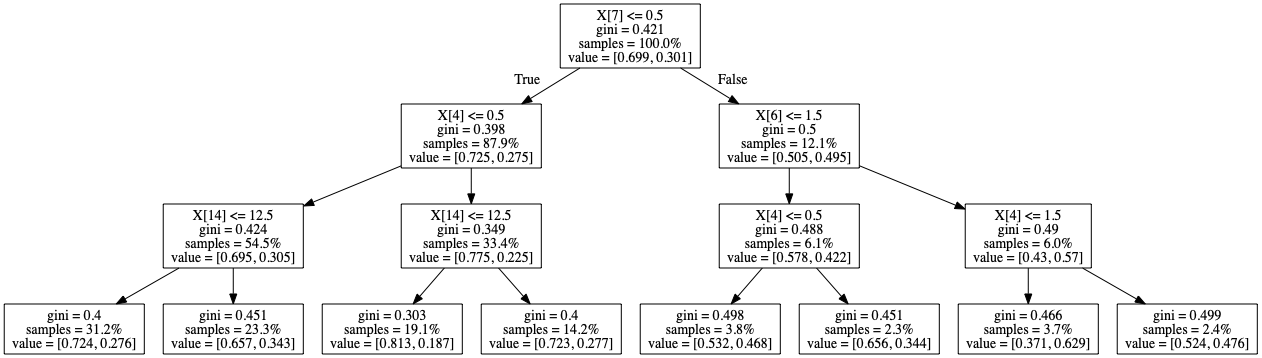

2


True

In [20]:
from sklearn import datasets
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image 
# import graphviz
import pydot
import pydotplus
my_df1 = df_train_test.fillna(-1)
var_tree = ['放款笔数', '失败笔数','累计逾期天数','最大逾期天数','最小逾期天数',
           '最大结清天数(展期算新的订单)','逾期次数(展期算新的订单)','单笔最小结清天数']
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
clf = clf.fit(my_df1[feature_list], my_df1['flag1'])
# print(clf)
# from sklearn.metrics import accuracy_score
# y_predict = clf.predict(my_df1[feature_list])
# accuracy_score(my_df1['flag1'], y_predict)
# from sklearn.metrics import confusion_matrix
# pd.DataFrame(
#     confusion_matrix(my_df1['flag1'], y_predict),
#     columns=['Predicted Not Survival', 'Predicted Survival'],
#     index=['True Not Survival', 'True Survival']
# )


dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, proportion=True)  
print(1)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
print(2)
graph.write_png(file_path + 'old.png')
